In [1]:
#all import statements
import os
import pandas as pd
import torch 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
#function to train the model
def modeltrain(X_train, y_train,l2_lambda=0.01,verbose=True):  # Specify the regularization strength (lambda)
    # global model
    input_size = X_train.shape[1]
    model = nn.Linear(input_size, 1).double()  # Double data type for weight tensor

    # Define loss function and optimizer with L2 regularization
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=l2_lambda)  # Adding weight decay for L2 regularization

    # Train the model (rest of the code remains the same)
    num_epochs = 1000

    if verbose==True:
        for epoch in range(num_epochs):
            # Forward pass
            outputs = model(X_train.double())  # Ensure input data type matches model's weight data type
            loss = criterion(outputs, y_train.view(-1, 1))

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    print('Training Done')
    return model


In [13]:
#function to test the model

def modeltest(X_test,y_test,model,verbose=True):
    if verbose:
        print("Testing starting")
    
    # Assuming 'model' is your trained linear regression model
 
    with torch.no_grad():
        predictions = model(X_test)



    if verbose:
        print('testing over now accuracy analysis')

    correct_pred=0
    for i in range(len(predictions)):
       
        if(abs(predictions[i]-y_test[i])<0.5):
            
            correct_pred+=1
    mean_accuracy=(correct_pred/len(predictions))*100
    

    
    

    #Calculation of mae,mse and r2 squared 
    mae = (mean_absolute_error(y_test, predictions))
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions.numpy())
    
    if verbose:        
        print(f'Percentage Accuracy: {mean_accuracy:.2f}%')
        print(f'Mean Absolute Error: {mae}')
        print(f'Mean Squared Error: {mse}')
        print(f'R-squared: {r2}')

    # Printing  the model parameters (coefficients)
    # for name, param in model.named_parameters():
    #     if param.requires_grad:
    #         print(f'{name}: {param.data.numpy()}')

    return predictions

    

In [4]:
#Function to  create a scatter plot for target and in the same plot  line plot for model predictions
def create_plot(X,y,z):
   
    feature_to_plot=[]
    list2=[]
    for i in range(len(X)):
        feature_to_plot.append(i+1)
        
  
    for i in range(len(y)):
     
         list2.append([z[i].item(),y[i].item()])
    # print(list2)
    list2.sort()
    y=[]
    z=[]
    for i in range(len(list2)):
        y.append(list2[i][1])
        z.append(list2[i][0])


    # Create a scatter plotc.ear
   
    plt.scatter(feature_to_plot,y,label='label(y)',alpha=0.5,color='red')

    # # plt.scatter(feature_to_plot3, y, alpha=0.5)  #line plot
    #Creating plot with label and axis name
    plt.plot(feature_to_plot,z,label='prediction(z)',alpha=0.5)
   
    plt.legend()
    plt.xlabel('Data Point')  # Replace with the appropriate feature name
    plt.ylabel('prediction(z),label(y)')
    plt.title('Prediction(z),label(y) vs. Data Point')
    plt.show()

In [5]:
model=None
X_train=None
y_train=None
X_test=None
y_test=None
def tester(testing_row=None):
   
    if testing_row is None:
        print("input size is ",X_test.shape," and output size is ",(y_test.shape))
        # pred=0
        pred=modeltest(X_test,y_test,model,verbose=False)
        
    else:
        
        # print(X_test[testing_row].shape)
        # print(y_test[testing_row].shape)
        x1=X_test[testing_row].view(1,-1)
        y1=y_test[testing_row].view(1)
        print("input size is ",x1.shape," and output size is ",(y1.shape))
        
        pred=0
        pred=modeltest(x1,y1,model,verbose=False)
        pred1=pred.item()
        # print("---------------------------------------------------------")
        print("input features are : ",(x1).tolist())
        print("prediction is ",round(pred1,2))
        y1=y1.item()
        print("actual value is ",round(y1,2))
        print("relative error is ",round((abs(y1-pred1))*100/y1,2),"%")
        print("---------------------------------------------------------")
        print()

    return pred
        


Epoch [100/1000], Loss: 4.368053281946645
Epoch [200/1000], Loss: 4.073629242034072
Epoch [300/1000], Loss: 3.9690392994070143
Epoch [400/1000], Loss: 3.928539996921427
Epoch [500/1000], Loss: 3.9110123572419857
Epoch [600/1000], Loss: 3.9023280068835353
Epoch [700/1000], Loss: 3.8974287144379347
Epoch [800/1000], Loss: 3.8943743137796103
Epoch [900/1000], Loss: 3.892340535154047
Epoch [1000/1000], Loss: 3.890930283033114
Training Done
input size is  torch.Size([90, 3])  and output size is  torch.Size([90])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 3])
torch.Size([90])
torch.Size([90, 1])


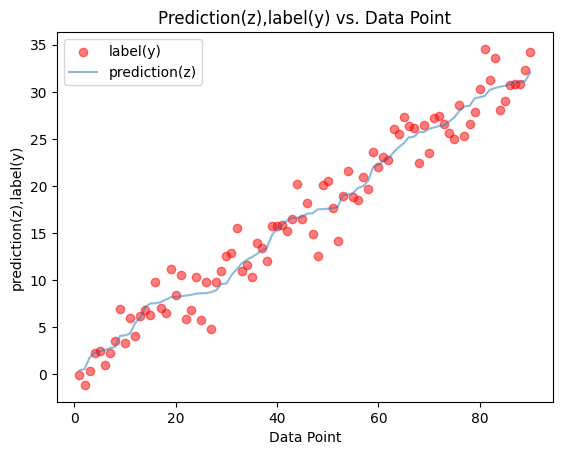

Linear(in_features=3, out_features=1, bias=True)
------------------------------------------------


In [6]:
# create_plot(X_train,y_train)
# model = load_or_initialize_model(X_train,y_train)

'''Function to train the model with selected feature drop feature corresponds to list of feature to drop and testing=True by default means MSE,MAE,
R-squared will be computed else will only train the model and send it for testing without computing MSE,MAE,R-squared'''
def train_with_selected_features(drop_features=[],testing=True):
    if type(drop_features)==type("string"):
        drop_features=[drop_features]
    global model
    global X_test
    global y_test
    global X_train
    global y_train
    
    #Data  proccessing and normalisation 

    df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')




    # Define a mapping from categories to numerical values
    if 'X3' not in drop_features:
    
        category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
        df['X3'] = df['X3'].map(category_mapping)

    # Separate the target variable 'y' from the input features.Also features not required are dropped

    drop_features.append('y')
    X = df.drop(columns=drop_features)
 
    y = df['y']

    for column in X.columns:
        try:
            X[column] = X[column].astype(float)
        except ValueError:
            print(f"Column '{column}' cannot be converted to float.")



    # Convert the DataFrame to a PyTorch tensor.
    X = torch.tensor(X.values, dtype=torch.float64)
    # Convert the target variable to a PyTorch tensor.
    y = torch.tensor(y.values, dtype=torch.float64)
    X1=X


    size=len(X)
    train_ratio=0.7
    train_size=int(size*train_ratio)
    # test_size=size-train_size


    #Splitting the data in training and testing data 


    #Training data
    X_train=X[:train_size]
    y_train=y[:train_size]

    #Testing data
    
    X_test=X[train_size:]
    y_test=y[train_size:]

  
    
    model=modeltrain(X_train, y_train,l2_lambda=0.01,verbose=testing)  # You can adjust the regularization st

    # pred=modeltest(X_test,y_test,model)
    
    if testing==True:
        pred=tester()
       
        print(type(y_test))
        print(type(pred))
        for i in [X_test,y_test,pred]:
     
            print(i.shape)
        create_plot(X_test,y_test,pred)
        
        print(model)
    print("------------------------------------------------")
    
    # return X_test

train_with_selected_features()

In [7]:
#Relation of input variables with each other (EDA)
input1=[]
input2=[]
input3=[]
output=[]
for i in range(len(X_train)):
    c=X_train[i][0]

    input1.append(c.item())
    c=X_train[i][1]

    input2.append(c.item())
    c=X_train[i][2]
    input3.append(c.item())
    c=y_train[i]
    output.append(c.item())


covariance_matrix = np.cov(input1, input2)

'''Extract the covariance between the two variables from the covariance matrix.Numpy arrays are 
 used here and its built in functions utilised to compute covariance'''


covariance_matrix1 = np.cov(input1, input3)
covariance_matrix2 = np.cov(input3, input2)
covariance_matrix3=np.cov(input1, output)
covariance_matrix4=np.cov(input2, output)
covariance_matrix5=np.cov(input3, output)
covariance = covariance_matrix[0, 1]
covariance1 = covariance_matrix1[0, 1]
covariance2 = covariance_matrix2[0, 1]
covariance3 = covariance_matrix3[0, 1]
covariance4 = covariance_matrix4[0, 1]
covariance5 = covariance_matrix5[0, 1]

#Extracting correlation factor between target and each input
correlation_coefficient1 = np.corrcoef(input1, y_train)[0, 1]
correlation_coefficient2 = np.corrcoef(input2, y_train)[0, 1]
correlation_coefficient3 = np.corrcoef(input3, y_train)[0, 1]



print("Covariance between X1 and X2:", covariance)
print("Covariance between X2 and X3:", covariance1)
print("Covariance between X3 and X1:", covariance2)
print("Covariance between X1 and y:", covariance3)
print("Covariance between X2 and y:", covariance4)
print("Covariance between X3 and y:", covariance5)

print("---------------------------------------------------")

print(f"Correlation Coefficient between X1 and y: {correlation_coefficient1:.2f}")
print(f"Correlation Coefficient between X2 and y: {correlation_coefficient2:.2f}")
print(f"Correlation Coefficient between X3 and y: {correlation_coefficient3:.2f}")





Covariance between X1 and X2: 0.12740488844015435
Covariance between X2 and X3: 0.015396627005088991
Covariance between X3 and X1: -0.014171793119161571
Covariance between X1 and y: 24.942920604841778
Covariance between X2 and y: 0.9254363356859601
Covariance between X3 and y: 0.11293652151999131
---------------------------------------------------
Correlation Coefficient between X1 and y: 0.97
Correlation Coefficient between X2 and y: 0.20
Correlation Coefficient between X3 and y: 0.01


In [8]:
#




In [9]:
#Function  to remove any two features and train the model


Linear(in_features=3, out_features=1, bias=True)
Epoch [100/1000], Loss: 4.312187353881675
Epoch [200/1000], Loss: 4.052453041283289
Epoch [300/1000], Loss: 3.959676238355752
Epoch [400/1000], Loss: 3.9237699069974457
Epoch [500/1000], Loss: 3.908246901476582
Epoch [600/1000], Loss: 3.9005665491143593
Epoch [700/1000], Loss: 3.8962388757408135
Epoch [800/1000], Loss: 3.8935423817741444
Epoch [900/1000], Loss: 3.89174655011067
Epoch [1000/1000], Loss: 3.890500144183337
Training Done
input size is  torch.Size([90, 3])  and output size is  torch.Size([90])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 3])
torch.Size([90])
torch.Size([90, 1])


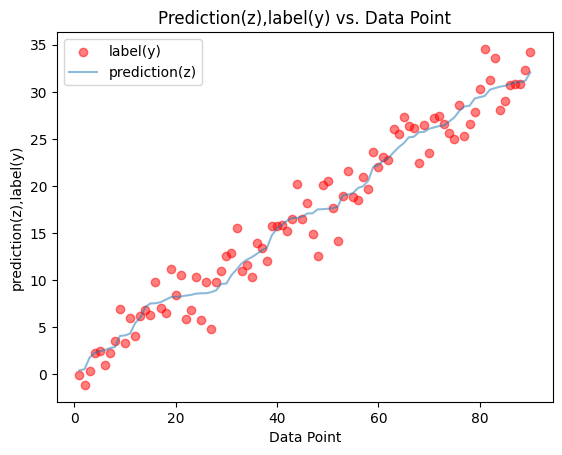

Linear(in_features=3, out_features=1, bias=True)
------------------------------------------------
Epoch [100/1000], Loss: 89.28324523324066
Epoch [200/1000], Loss: 84.10077633444095
Epoch [300/1000], Loss: 81.66898891425936
Epoch [400/1000], Loss: 80.36398546752484
Epoch [500/1000], Loss: 79.59311952702429
Epoch [600/1000], Loss: 79.1102842759054
Epoch [700/1000], Loss: 78.7974291394861
Epoch [800/1000], Loss: 78.59047286227887
Epoch [900/1000], Loss: 78.45155698289706
Epoch [1000/1000], Loss: 78.35716817260703
Training Done
input size is  torch.Size([90, 2])  and output size is  torch.Size([90])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 2])
torch.Size([90])
torch.Size([90, 1])


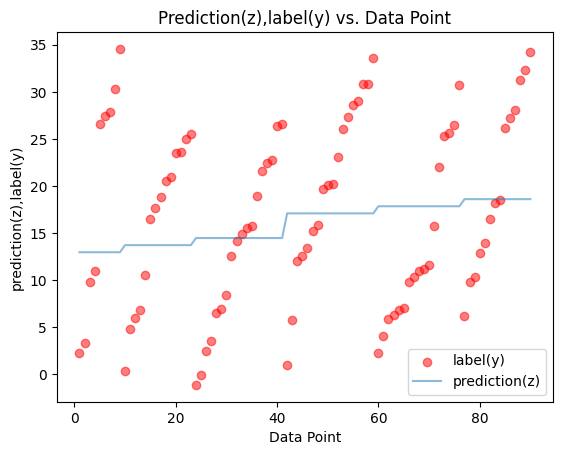

Linear(in_features=2, out_features=1, bias=True)
------------------------------------------------
Epoch [100/1000], Loss: 5.048725986942494
Epoch [200/1000], Loss: 5.038991235180367
Epoch [300/1000], Loss: 5.035390524824344
Epoch [400/1000], Loss: 5.034067366970252
Epoch [500/1000], Loss: 5.033586502943101
Epoch [600/1000], Loss: 5.033415076233762
Epoch [700/1000], Loss: 5.033356055047113
Epoch [800/1000], Loss: 5.033337074295578
Epoch [900/1000], Loss: 5.033331858841095
Epoch [1000/1000], Loss: 5.0333310566796
Training Done
input size is  torch.Size([90, 1])  and output size is  torch.Size([90])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 1])
torch.Size([90])
torch.Size([90, 1])


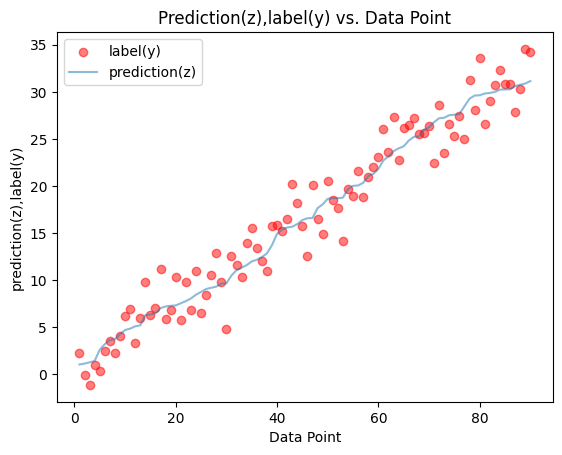

Linear(in_features=1, out_features=1, bias=True)
------------------------------------------------


In [10]:
### You can uncomment these two to run the code for model predictions by removing one and two features respectively.


print(model)
train_with_selected_features()

# Function  to remove any one features and train the model
train_with_selected_features('X1')

# Function  to remove any one features and train the model
train_with_selected_features(['X2','X3'])

# all

In [11]:
# doesnt alter model, only tests:
# testing over all values:
tester()



input size is  torch.Size([90, 1])  and output size is  torch.Size([90])


tensor([[31.1414],
        [ 7.3108],
        [21.0581],
        [ 8.7412],
        [ 1.2642],
        [23.9945],
        [10.4880],
        [12.4429],
        [18.7547],
        [26.2335],
        [20.0076],
        [27.5153],
        [ 9.0561],
        [25.2167],
        [ 6.3476],
        [29.9845],
        [21.8102],
        [ 7.2680],
        [29.8175],
        [23.1464],
        [ 8.4522],
        [ 7.2003],
        [16.5943],
        [ 1.4186],
        [ 7.0203],
        [13.7130],
        [12.1565],
        [14.9112],
        [ 9.1820],
        [18.7074],
        [27.2443],
        [ 4.2492],
        [16.5690],
        [ 4.6971],
        [22.7152],
        [12.8310],
        [18.0492],
        [ 6.2750],
        [ 5.0908],
        [15.6655],
        [11.5848],
        [29.6037],
        [24.2085],
        [23.6951],
        [28.4726],
        [ 3.1983],
        [17.6416],
        [18.6363],
        [30.2663],
        [ 9.6293],
        [ 8.0481],
        [ 3.7181],
        [ 1.

In [12]:
# testing for particular value with all features:
train_with_selected_features(testing=False)
tester(2)

# testing for particular value with only X1 feature:
train_with_selected_features(['X2','X3'],testing=False)
tester(2)

Training Done
------------------------------------------------
input size is  torch.Size([1, 3])  and output size is  torch.Size([1])
input features are :  [[6.630782031001008, 0.0, 2.0]]
prediction is  -2.12
actual value is  20.9
relative error is  110.13 %
---------------------------------------------------------

Training Done
------------------------------------------------
input size is  torch.Size([1, 1])  and output size is  torch.Size([1])
input features are :  [[6.630782031001008]]
prediction is  -2.91
actual value is  20.9
relative error is  113.92 %
---------------------------------------------------------



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


tensor([[-2.9104]], dtype=torch.float64)